## Import Necessary Libraries

In [41]:
# For Data Processing
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

---
### Import Dataset

### Brief Explanation of the dataset's abbreviated variables
Attributes related with Eating Habits: <br>
FAVC: Frequent consumption of high caloric food <br>
FCVC: Frequency of consumption of vegetables <br>
NCP: Number of main meals<br>
CAEC: Consumption of food between meals<br>
CH20: Consumption of water daily<br>
CALC: Consumption of alcohol<br>

Attributes related with the Physical Conditions: <br>
SCC: Calories consumption monitoring <br>
FAF: Physical activity frequency<br>
TUE: Time using technology devices <br>
MTRANS: Transportation used<br>

Class variable NObeyesdad was created based on Equation (Mass Body Index = Weight/height*height) with the values of: <br> Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III, 

In [42]:
# The DataFrame is large thus it will only return the first 5 row
df = pd.read_csv('datasets/ObesityDataSet_raw_and_data_sinthetic.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [43]:
# displaying the whole DF
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 2)
display(df)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.00,1.62,64.00,yes,no,2.00,3.00,Sometimes,no,2.00,no,0.00e+00,1.00e+00,no,Public_Transportation,Normal_Weight
1,Female,21.00,1.52,56.00,yes,no,3.00,3.00,Sometimes,yes,3.00,yes,3.00e+00,0.00e+00,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.00,1.80,77.00,yes,no,2.00,3.00,Sometimes,no,2.00,no,2.00e+00,1.00e+00,Frequently,Public_Transportation,Normal_Weight
3,Male,27.00,1.80,87.00,no,no,3.00,3.00,Sometimes,no,2.00,no,2.00e+00,0.00e+00,Frequently,Walking,Overweight_Level_I
4,Male,22.00,1.78,89.80,no,no,2.00,1.00,Sometimes,no,2.00,no,0.00e+00,0.00e+00,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.00,1.62,53.00,no,yes,2.00,3.00,Sometimes,no,2.00,no,0.00e+00,0.00e+00,Sometimes,Automobile,Normal_Weight
6,Female,23.00,1.50,55.00,yes,yes,3.00,3.00,Sometimes,no,2.00,no,1.00e+00,0.00e+00,Sometimes,Motorbike,Normal_Weight
7,Male,22.00,1.64,53.00,no,no,2.00,3.00,Sometimes,no,2.00,no,3.00e+00,0.00e+00,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.00,1.78,64.00,yes,yes,3.00,3.00,Sometimes,no,2.00,no,1.00e+00,1.00e+00,Frequently,Public_Transportation,Normal_Weight
9,Male,22.00,1.72,68.00,yes,yes,2.00,3.00,Sometimes,no,2.00,no,1.00e+00,1.00e+00,no,Public_Transportation,Normal_Weight


In [44]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00
mean,24.31,1.70,86.59,2.42,2.69,2.01,1.01,0.66
std,6.35,0.09,26.19,0.53,0.78,0.61,0.85,0.61
min,14.00,1.45,39.00,1.00,1.00,1.00,0.00,0.00
25%,19.95,1.63,65.47,2.00,2.66,1.58,0.12,0.00
50%,22.78,1.70,83.00,2.39,3.00,2.00,1.00,0.63
75%,26.00,1.77,107.43,3.00,3.00,2.48,1.67,1.00
max,61.00,1.98,173.00,3.00,4.00,3.00,3.00,2.00


In [45]:
print(df.dtypes)

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


In [46]:
#Extracting the variables with type Object from the df
df_object = pd.DataFrame(df[['Gender', 'family_history_with_overweight','FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS'
                         ,'NObeyesdad']])
df_object.head()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight
3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II


In [47]:
#Convert the variable types from object to category
df_cat = df_object.astype("category")

df_cat.describe()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


In [48]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [49]:
#Extracting the numeric variables from the original df
df_numeric = df.drop(labels = ['Gender', 'family_history_with_overweight','FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS'
                         ,'NObeyesdad'], axis = 1)

In [50]:
print(df_numeric.dtypes)
print(df_numeric.head())

Age       float64
Height    float64
Weight    float64
FCVC      float64
NCP       float64
CH2O      float64
FAF       float64
TUE       float64
dtype: object
    Age  Height  Weight  FCVC  NCP  CH2O  FAF  TUE
0  21.0   1.62    64.0    2.0  3.0   2.0  0.0  1.0
1  21.0   1.52    56.0    3.0  3.0   3.0  3.0  0.0
2  23.0   1.80    77.0    2.0  3.0   2.0  2.0  1.0
3  27.0   1.80    87.0    3.0  3.0   2.0  2.0  0.0
4  22.0   1.78    89.8    2.0  1.0   2.0  0.0  0.0


In [51]:
#Joining both numeric and categorical variables into one dataframe called 'data'
#Basically the same as the original df, just that I converted the object to categorical
data = df_numeric.join(df_cat)
data.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II


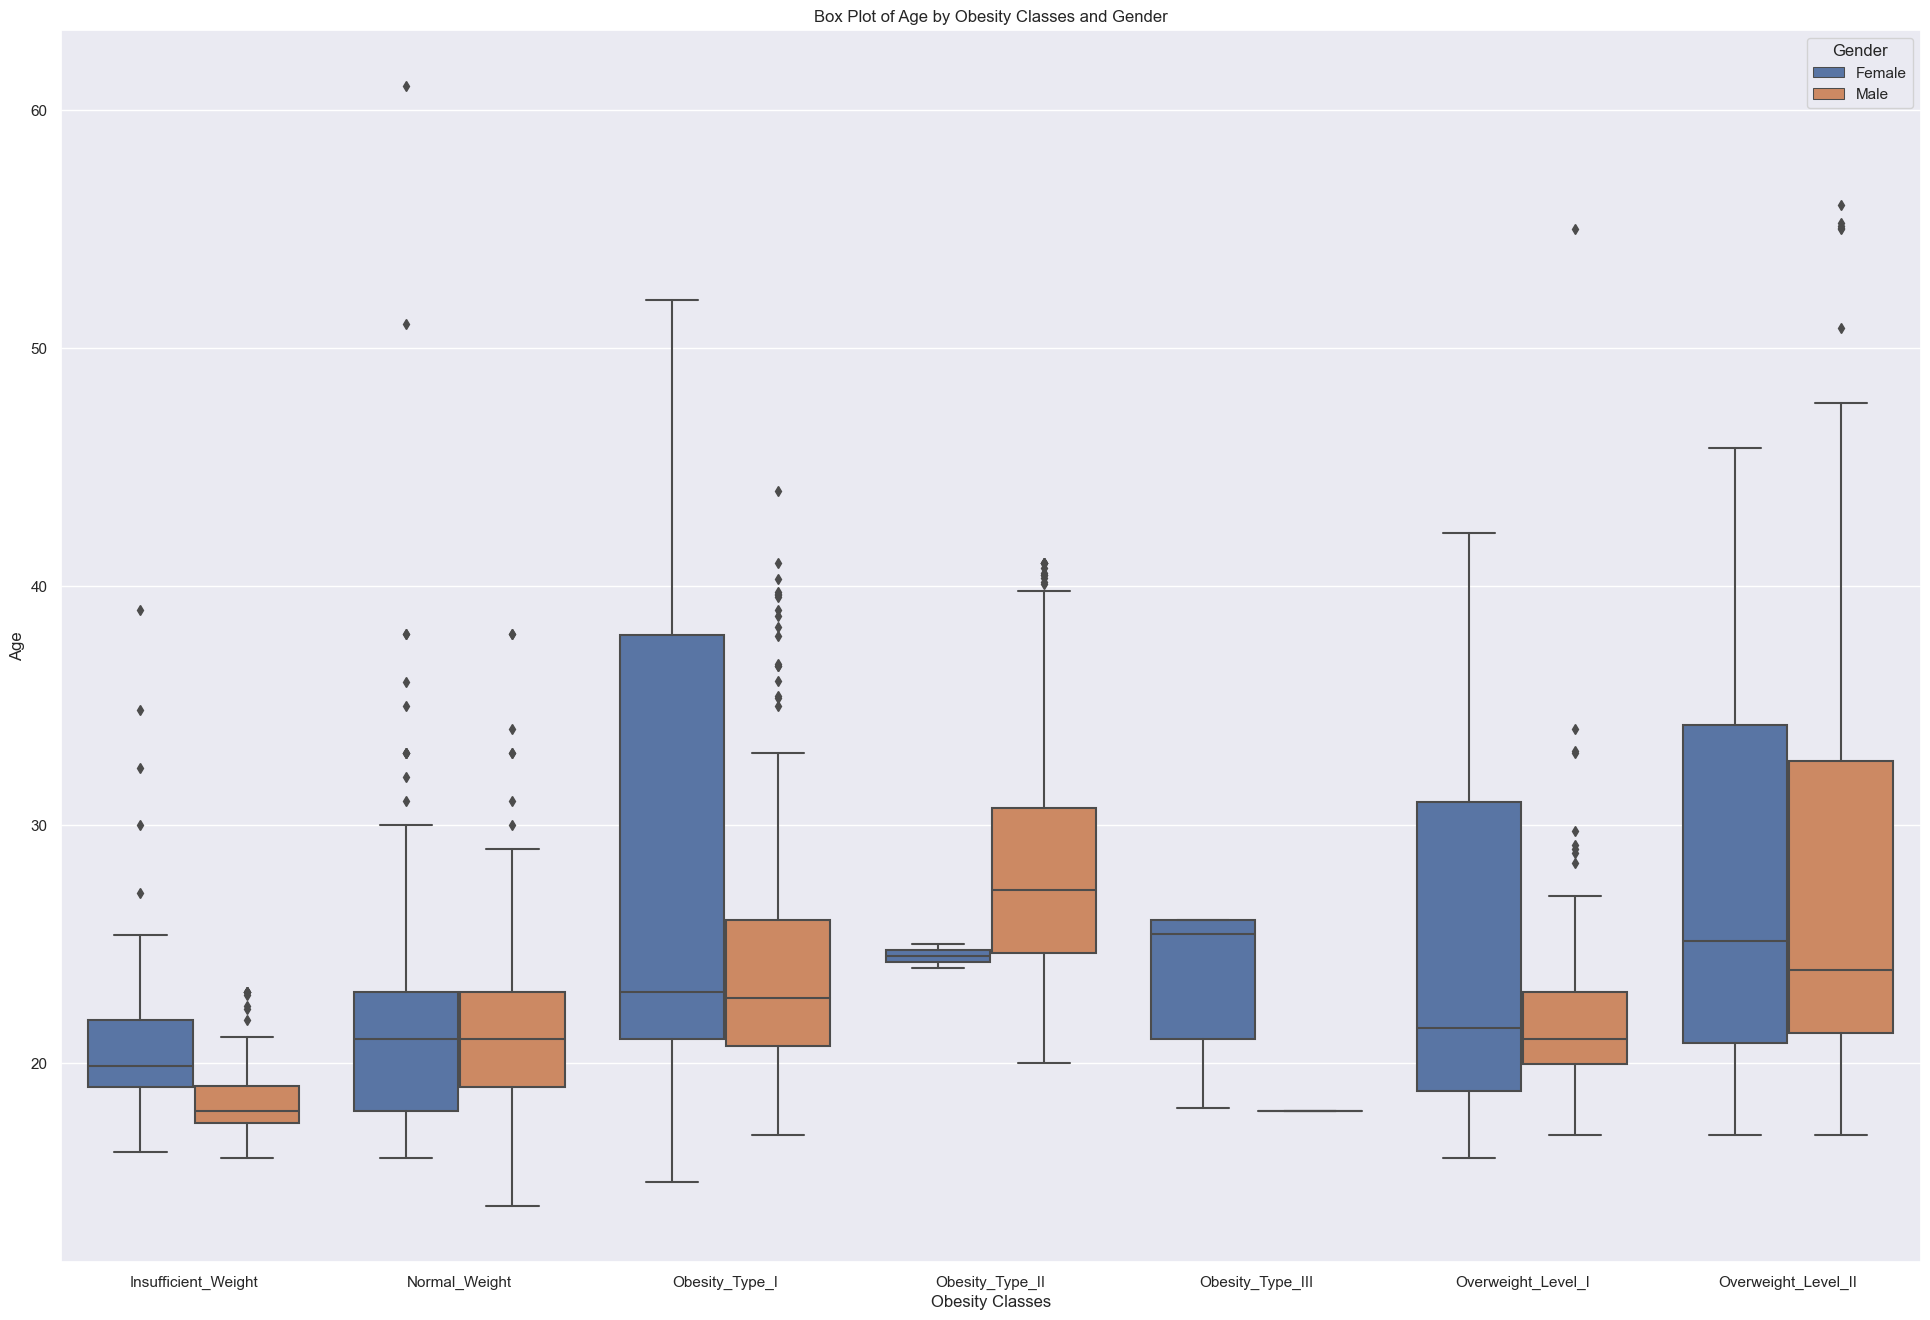

In [52]:
#Boxplot of NObeyesdad vs Age with Gender
f = plt.figure(figsize=(24, 16))
sb.boxplot(x='NObeyesdad', y='Age', hue='Gender', data=data)
plt.xlabel('Obesity Classes')
plt.ylabel('Age')
plt.title('Box Plot of Age by Obesity Classes and Gender')
plt.show()


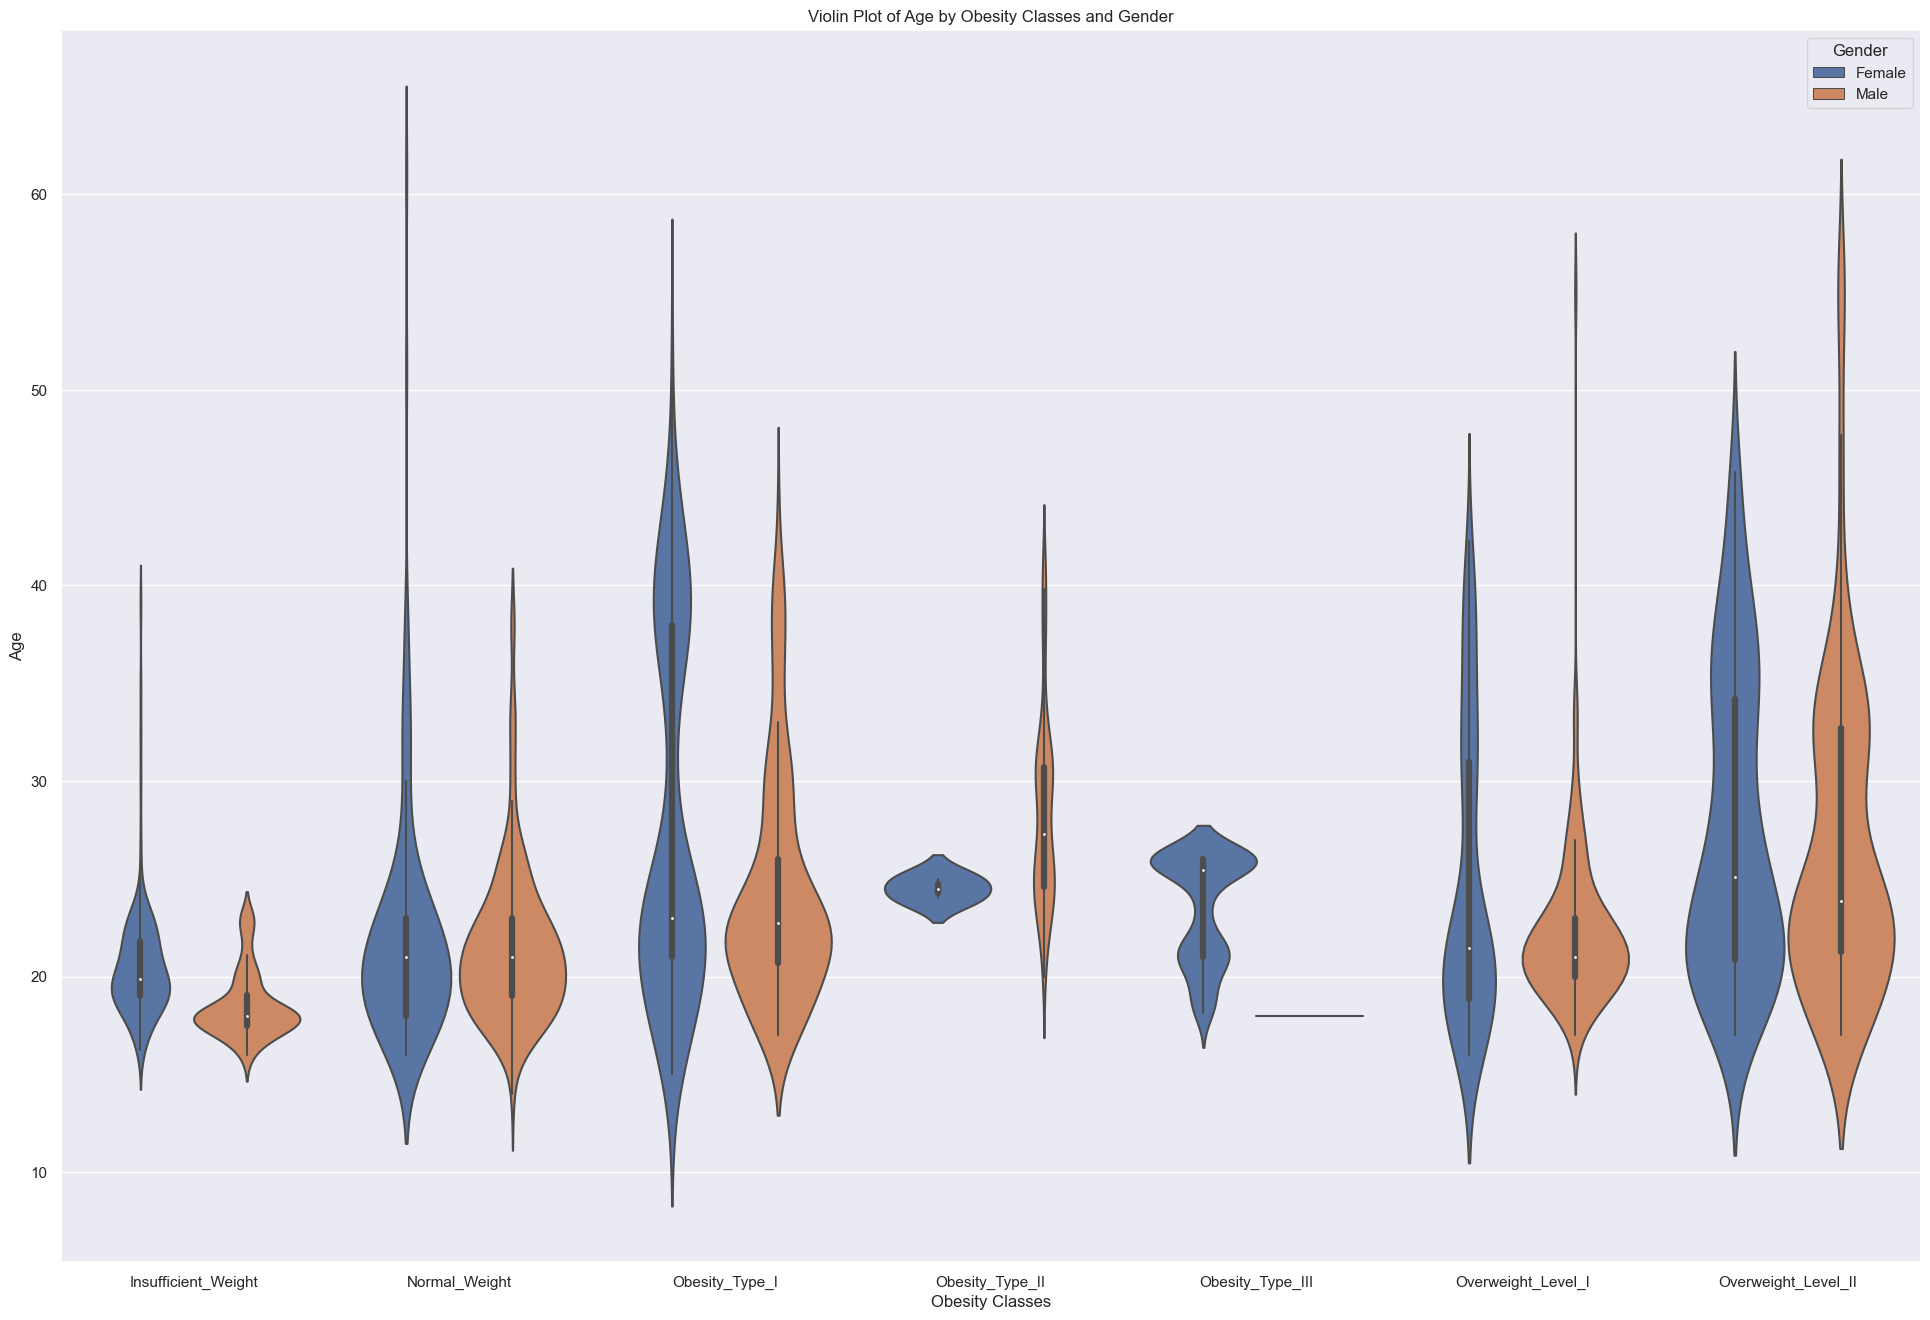

In [53]:
#Violin Plot of NObeyesdad vs Age with Gender
f = plt.figure(figsize=(24, 16))
sb.violinplot(x='NObeyesdad', y='Age', hue='Gender', data=data)
plt.xlabel('Obesity Classes')
plt.ylabel('Age')
plt.title('Violin Plot of Age by Obesity Classes and Gender')
plt.show()